In [33]:
import numpy as np
import quaternion
import math
from numpy import linalg as LA

deg = 180/math.pi

x0 = [1, 0, 0]
y0 = [0, 1, 0]
z0 = [0, 0, 1]

x0_quat = quaternion.quaternion(0,1,0,0)
y0_quat = quaternion.quaternion(0,0,1,0)
z0_quat = quaternion.quaternion(0,0,0,1)

beta = 45*math.pi/180


### GOAL VECTOR (the desired Z axis)###
goal = [0.0,0.0,1.0]


goal_norm = []
for i in goal:
    goal_norm.append(i/LA.norm(goal)) #Normalized vector of goal
    
print("goal : ",goal_norm)

### VECTOR AND ANGLE OF ROTATION ###
vector= np.cross(z0,goal_norm)

vector_norm = [] #Normalized vector of rotation
for i in vector:
    vector_norm.append(i/LA.norm(vector))

alpha = math.acos(np.vdot(z0,goal_norm)) #Angle of rotation
print("alpha : ",alpha*deg)

if alpha == 0 :
    v = quaternion.quaternion(0.0,0.0,0.0,1.0)
    print("v : ",v)
    
else :  
    v = quaternion.quaternion(0.0,vector_norm[0],vector_norm[1],vector_norm[2]) #Vector of rotation as a quaternion
    print("v : ",v)





### QUATERNION OF ROTATION ###
w1 = math.cos(alpha/2.0)
x1 = math.sin(alpha/2.0)*v.x
y1 = math.sin(alpha/2.0)*v.y
z1 = math.sin(alpha/2.0)*v.z

q1 = quaternion.quaternion(w1,x1,y1,z1) #1st rotation quaternion
q1_inv = q1.inverse()

z_prime = q1*z0_quat*q1_inv

print("z after 1st rotation : ",z_prime)

w2 = math.cos(beta/2.0)
x2 = math.sin(beta/2.0)*z_prime.x
y2 = math.sin(beta/2.0)*z_prime.y
z2 = math.sin(beta/2.0)*z_prime.z

q2 = quaternion.quaternion(w2,x2,y2,z2) #Quaternion of the rotation on new z axis
q2_inv = q2.inverse()

new_z = q2*z_prime*q2_inv #Final Z
new_x = q2*(q1*x0_quat*q1_inv)*q2_inv #Final X
new_y = q2*(q1*y0_quat*q1_inv)*q2_inv #Final Y

X = [new_x.x, new_x.y, new_x.z]
Y = [new_y.x, new_y.y, new_y.z]
Z = [new_z.x, new_z.y, new_z.z]

print("Final X : ",X)
print("Final Y : ",Y)
print("Final Z : ",Z)

goal :  [0.0, 0.0, 1.0]
alpha :  0.0
v :  quaternion(0, 0, 0, 1)
z after 1st rotation :  quaternion(0, 0, 0, 1)
Final X :  [0.7071067811865475, 0.7071067811865476, 0.0]
Final Y :  [-0.7071067811865476, 0.7071067811865475, 0.0]
Final Z :  [0.0, 0.0, 1.0]


/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


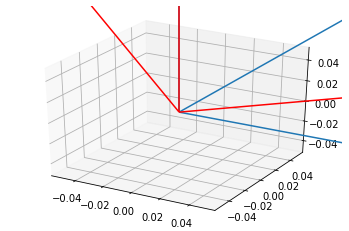

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

origin = [0,0,0]
X_, Y_, Z_ = zip(origin,origin,origin)
X0_,Y0_,Z0_ = zip(origin,origin,origin)
U, V, W = zip(X,Y,Z)
U0,V0,W0 = zip(x0,y0,z0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.quiver(X0_,Y0_,Z0_,U0,V0,W0,arrow_length_ratio=0.01)
ax.quiver(X_,Y_,Z_,U,V,W,arrow_length_ratio=0.01,color='r')
plt.show()

In [35]:
angle = math.acos(np.vdot(X,Z))
print(angle*deg)

90.0


In [124]:
from sympy.solvers import *
from sympy.abc import a,b
from sympy import cos,sin

Pc = [0,0,83.40]
C = [0,0,64.64]
R = 37.528
Rp = R*math.cos(30.0*math.pi/180)

eq1 = []

for i in range(2):
    eq1.append(Pc[i]+R*cos(a)*Z[i]+R*sin(a)*X[i]-(C[i]+Rp*cos(b)*x0[i]+Rp*sin(b)*y0[i]))

res = solve(eq1,a,b)
resultat=[]
for i in range(len(res)):
    resultat.append([])
    for j in res[i]:
        resultat[i].append(j*180/math.pi)
print(resultat)

[[-59.9999999999998, -135.000000000000], [59.9999999999998, 45.0000000000000], [120.000000000000, 45.0000000000000], [240.000000000000, -135.000000000000]]
